In [2]:
import numpy as np
import torch
import torch.nn as nn


In [6]:
arr = np.ones((3, 3))
print("ndarray的数据类型：", arr.dtype)
# 创建存放在 GPU 的数据
# t = torch.tensor(arr, device='cuda')
t= torch.tensor(arr)
print(t)

ndarray的数据类型： float64
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [9]:
# mean：标量 std: 标量
# 这里需要设置 size
t_normal = torch.normal(0., 1., size=(4,))
print(t_normal)

tensor([ 0.4199, -0.3757, -1.0213, -0.5845])


In [12]:
# mean：张量 std: 标量
mean = torch.arange(1, 5, dtype=torch.float)
std = 1
t_normal = torch.normal(mean, std)
print("mean:{}\nstd:{}".format(mean, std))
print(t_normal)

mean:tensor([1., 2., 3., 4.])
std:1
tensor([1.8567, 2.3814, 3.5782, 4.3021])


In [14]:
# mean：张量 std: 张量
mean = torch.arange(1, 5, dtype=torch.float)
std = torch.arange(1, 5, dtype=torch.float)
t_normal = torch.normal(mean, std)
print("mean:{}\nstd:{}".format(mean, std))
print(t_normal)

mean:tensor([1., 2., 3., 4.])
std:tensor([1., 2., 3., 4.])
tensor([0.2500, 3.9196, 0.2403, 2.1053])


In [ ]:
torch.manual_seed(1)
# 生成均匀分布
t_uniform = torch.rand(2, 3)
print(t_uniform)
# 生成正态分布
t_normal = torch.randn(2, 3)
print(t_normal)

tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]])
tensor([[ 0.5636,  1.1431,  0.8590],
        [ 0.7056, -0.3406, -1.2720]])


## 张量操作

In [21]:
t = torch.ones((2, 3))
t_0 = torch.cat([t, t], dim=0)
t_1 = torch.cat([t, t], dim=1)
print("t_0:{} shape:{}\nt_1:{} shape:{}".format(t_0, t_0.shape, t_1, t_1.shape))

t_0:tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) shape:torch.Size([4, 3])
t_1:tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]]) shape:torch.Size([2, 6])


In [3]:
t = torch.ones((2, 3))
# dim =2
t_stack = torch.stack([t, t, t], dim=2)
print("\nt_stack.shape:{}".format(t_stack.shape))
print(t_stack)
# dim =0
t_stack = torch.stack([t, t, t], dim=0)
print("\nt_stack.shape:{}".format(t_stack.shape))
print(t_stack)


t_stack.shape:torch.Size([2, 3, 3])
tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])

t_stack.shape:torch.Size([3, 2, 3])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])


In [5]:
a = torch.ones((2, 7))  # 7
list_of_tensors = torch.chunk(a, dim=1, chunks=3)   # 3
for idx, t in enumerate(list_of_tensors):
	print("第{}个张量：{}, shape is {}".format(idx+1, t, t.shape))

第1个张量：tensor([[1., 1., 1.],
        [1., 1., 1.]]), shape is torch.Size([2, 3])
第2个张量：tensor([[1., 1., 1.],
        [1., 1., 1.]]), shape is torch.Size([2, 3])
第3个张量：tensor([[1.],
        [1.]]), shape is torch.Size([2, 1])


In [7]:
# 创建均匀分布
t = torch.randint(0, 9, size=(3, 3))
# 注意 idx 的 dtype 不能指定为 torch.float
idx = torch.tensor([0, 2], dtype=torch.long)
# 取出第 0 行和第 2 行
t_select = torch.index_select(t, dim=0, index=idx)
print("t:\n{}\nt_select:\n{}".format(t, t_select))

t:
tensor([[4, 2, 2],
        [1, 5, 3],
        [7, 3, 5]])
t_select:
tensor([[4, 2, 2],
        [7, 3, 5]])


In [4]:
t = torch.randint(0, 9, size=(3, 3))
mask = t.le(5)  # ge is mean greater than or equal/   gt: greater than  le  lt
# 取出大于 5 的数
t_select = torch.masked_select(t, mask)
print("t:\n{}\nmask:\n{}\nt_select:\n{} ".format(t, mask, t_select))

t:
tensor([[3, 7, 6],
        [8, 6, 3],
        [8, 2, 8]])
mask:
tensor([[ True, False, False],
        [False, False,  True],
        [False,  True, False]])
t_select:
tensor([3, 3, 2]) 


In [5]:
# 生成 0 到 8 的随机排列
t = torch.randperm(8)
# -1 表示这个维度是根据其他维度计算得出的
t_reshape = torch.reshape(t, (-1, 2, 2))
print("t:{}\nt_reshape:\n{}".format(t, t_reshape))

t:tensor([4, 6, 2, 0, 3, 7, 5, 1])
t_reshape:
tensor([[[4, 6],
         [2, 0]],

        [[3, 7],
         [5, 1]]])


In [6]:
# 修改张量 t 的第 0 个元素，张量 t_reshape 也会被改变
t[0] = 1024
print("t:{}\nt_reshape:\n{}".format(t, t_reshape))
print("t.data 内存地址:{}".format(id(t.data)))
print("t_reshape.data 内存地址:{}".format(id(t_reshape.data)))

t:tensor([1024,    6,    2,    0,    3,    7,    5,    1])
t_reshape:
tensor([[[1024,    6],
         [   2,    0]],

        [[   3,    7],
         [   5,    1]]])
t.data 内存地址:2090470529520
t_reshape.data 内存地址:2090470529520


In [7]:
#把 c * h * w 变换为 h * w * c
t = torch.rand((2, 3, 4))
t_transpose = torch.transpose(t, dim0=1, dim1=2)    # c*h*w     h*w*c
print("t shape:{}\nt_transpose shape: {}".format(t.shape, t_transpose.shape))

t shape:torch.Size([2, 3, 4])
t_transpose shape: torch.Size([2, 4, 3])


In [ ]:
# 维度 0 和 3 的长度是 1
t = torch.rand((1, 2, 3, 1))
# 可以移除维度 0 和 3
t_sq = torch.squeeze(t)
# 可以移除维度 0
t_0 = torch.squeeze(t, dim=0)
# 不能移除 1
t_1 = torch.squeeze(t, dim=1)
print("t.shape: {}".format(t.shape))
print("t_sq.shape: {}".format(t_sq.shape))
print("t_0.shape: {}".format(t_0.shape))
print("t_1.shape: {}".format(t_1.shape))

t.shape: torch.Size([1, 2, 3, 1])
t_sq.shape: torch.Size([2, 3])
t_0.shape: torch.Size([2, 3, 1])
t_1.shape: torch.Size([1, 2, 3, 1])


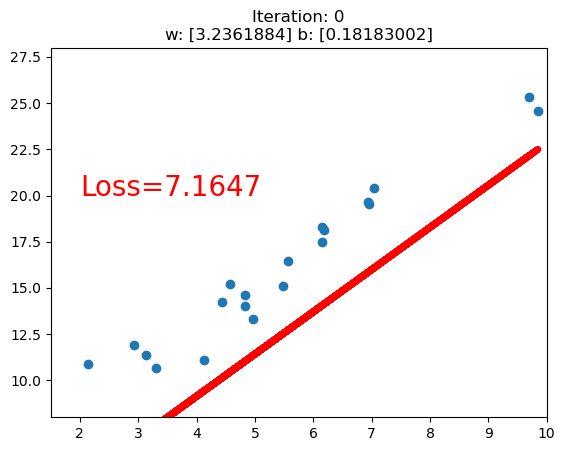

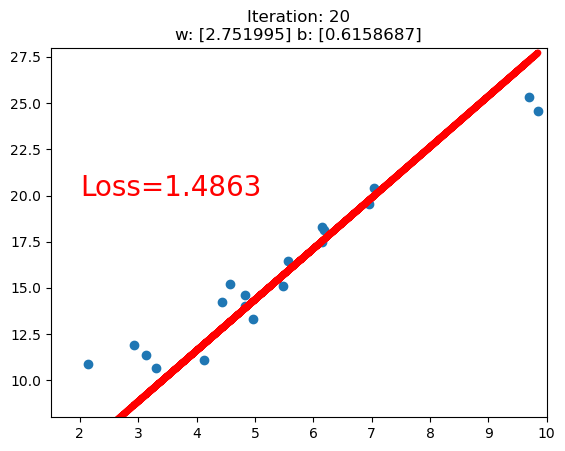

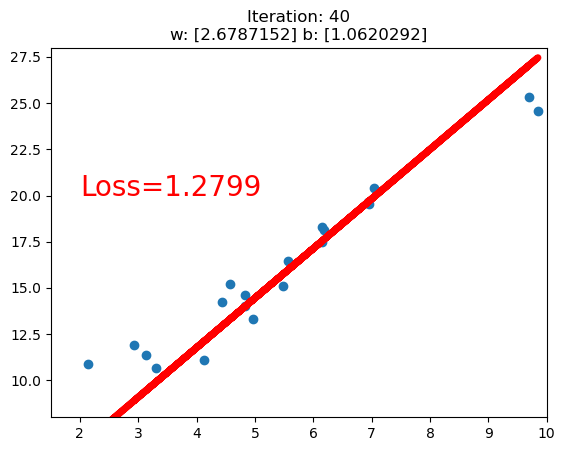

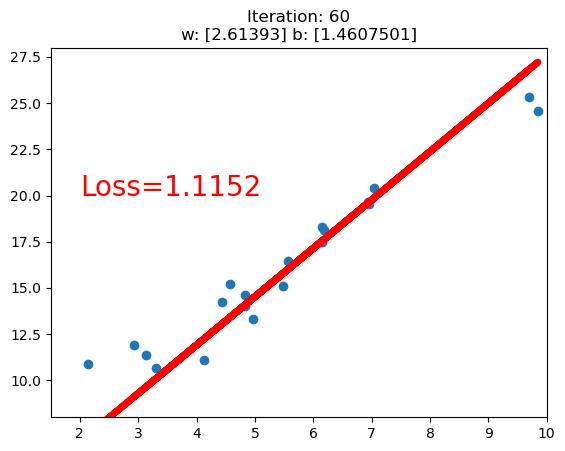

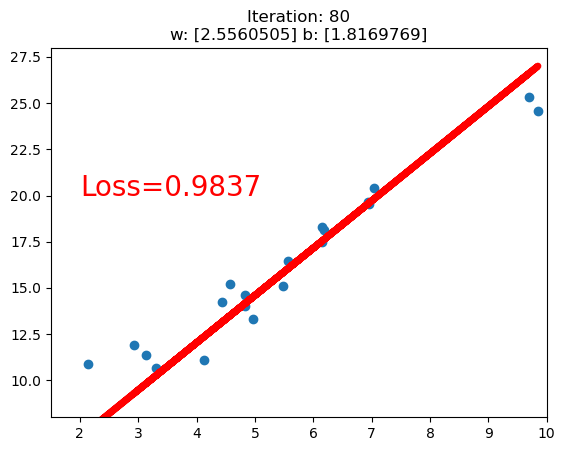

In [10]:
# 线性回归
import torch
import matplotlib.pyplot as plt
torch.manual_seed(10)

lr = 0.05  # 学习率

# 创建训练数据
x = torch.rand(20, 1) * 10  # x data (tensor), shape=(20, 1)
# torch.randn(20, 1) 用于添加噪声
y = 2*x + (5 + torch.randn(20, 1))  # y data (tensor), shape=(20, 1)

# 构建线性回归参数
w = torch.randn((1), requires_grad=True) # 设置梯度求解为 true
b = torch.zeros((1), requires_grad=True) # 设置梯度求解为 true

# 迭代训练 1000 次
for iteration in range(1000):

    # 前向传播，计算预测值
    wx = torch.mul(w, x)
    y_pred = torch.add(wx, b)

    # 计算 MSE loss
    loss = (0.5 * (y - y_pred) ** 2).mean()

    # 反向传播
    loss.backward()

    # 更新参数
    b.data.sub_(lr * b.grad)
    w.data.sub_(lr * w.grad)

    # 每次更新参数之后，都要清零张量的梯度
    w.grad.zero_()
    b.grad.zero_()

    # 绘图，每隔 20 次重新绘制直线
    if iteration % 20 == 0:

        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=5)
        plt.text(2, 20, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.xlim(1.5, 10)
        plt.ylim(8, 28)
        plt.title("Iteration: {}\nw: {} b: {}".format(iteration, w.data.numpy(), b.data.numpy()))
        plt.pause(0.5)

        # 如果 MSE 小于 1，则停止训练
        if loss.data.numpy() < 1:
            break

## 计算图


In [11]:
import torch
w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)
# y=(x+w)*(w+1)
a = torch.add(w, x)     # retain_grad()
b = torch.add(w, 1)
y = torch.mul(a, b)
# y 求导
y.backward()
# 打印 w 的梯度，就是 y 对 w 的导数
print(w.grad)

tensor([5.])


In [12]:
# 查看叶子结点
print("is_leaf:\n", w.is_leaf, x.is_leaf, a.is_leaf, b.is_leaf, y.is_leaf)

# 查看梯度
print("gradient:\n", w.grad, x.grad, a.grad, b.grad, y.grad)

is_leaf:
 True True False False False
gradient:
 tensor([5.]) tensor([2.]) None None None


C:\Users\Asuka\AppData\Local\Temp\ipykernel_14396\3215199549.py:5: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print("gradient:\n", w.grad, x.grad, a.grad, b.grad, y.grad)


In [13]:
# 查看梯度
print("w.grad_fn = ", w.grad_fn)
print("x.grad_fn = ", x.grad_fn)
print("a.grad_fn = ", a.grad_fn)
print("b.grad_fn = ", b.grad_fn)
print("y.grad_fn = ", y.grad_fn)

w.grad_fn =  None
x.grad_fn =  None
a.grad_fn =  <AddBackward0 object at 0x000001E6C1A64A30>
b.grad_fn =  <AddBackward0 object at 0x000001E6BA3119A0>
y.grad_fn =  <MulBackward0 object at 0x000001E6C1A64A30>


In [ ]:
w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)
# y=(x+w)*(w+1)
a = torch.add(w, x)
b = torch.add(w, 1)
y = torch.mul(a, b)

# 第一次求导，设置 retain_graph=True，保留计算图
y.backward(retain_graph=True)
print(w.grad)
# 第二次求导成功
y.backward()

tensor([5.])


In [15]:
w = torch.tensor([1.], requires_grad=True)
x = torch.tensor([2.], requires_grad=True)

a = torch.add(w, x)
b = torch.add(w, 1)

y0 = torch.mul(a, b)    # y0 = (x+w) * (w+1)
y1 = torch.add(a, b)    # y1 = (x+w) + (w+1)    dy1/dw = 2

# 把两个 loss 拼接都到一起
loss = torch.cat([y0, y1], dim=0)       # [y0, y1]
# 设置两个 loss 的权重: y0 的权重是 1，y1 的权重是 2
grad_tensors = torch.tensor([1., 2.])

loss.backward(gradient=grad_tensors)    # gradient 传入 torch.autograd.backward()中的grad_tensors
# 最终的 w 的导数由两部分组成。∂y0/∂w * 1 + ∂y1/∂w * 2
print(w.grad)

tensor([9.])


In [16]:
x = torch.tensor([3.], requires_grad=True)
y = torch.pow(x, 2)     # y = x**2
# 如果需要求 2 阶导，需要设置 create_graph=True，让一阶导数 grad_1 也拥有计算图
grad_1 = torch.autograd.grad(y, x, create_graph=True)   # grad_1 = dy/dx = 2x = 2 * 3 = 6
print(grad_1)
# 这里求 2 阶导
grad_2 = torch.autograd.grad(grad_1[0], x)              # grad_2 = d(dy/dx)/dx = d(2x)/dx = 2
print(grad_2)

(tensor([6.], grad_fn=<MulBackward0>),)
(tensor([2.]),)


In [21]:
for i in range(4):
    a = torch.add(w, x)
    b = torch.add(w, 1)
    y = torch.mul(a, b)
    y.backward()
    print(w.grad)
    # 每次都把梯度清零
    w.grad.zero_()

tensor([6.])
tensor([6.])
tensor([6.])
tensor([6.])


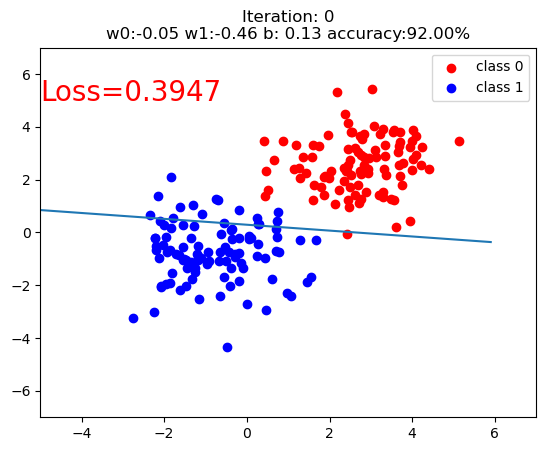

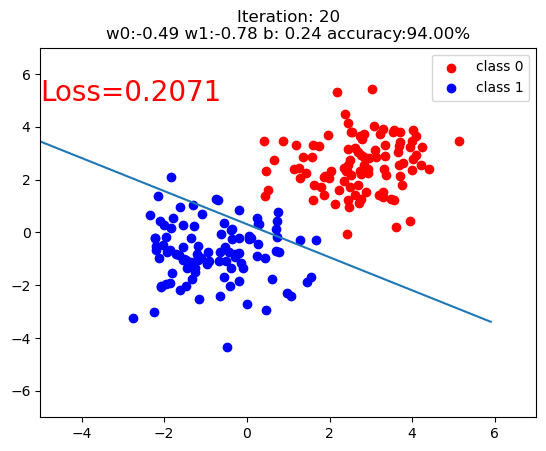

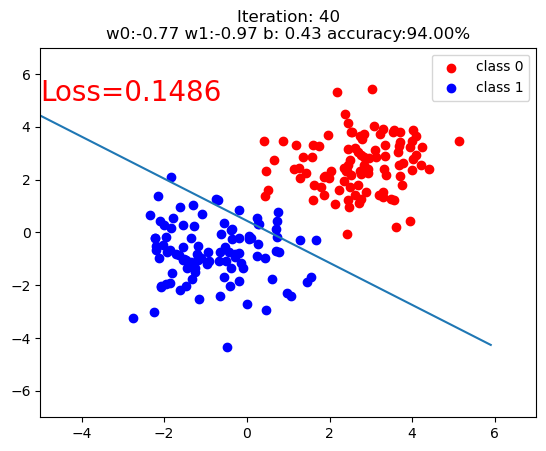

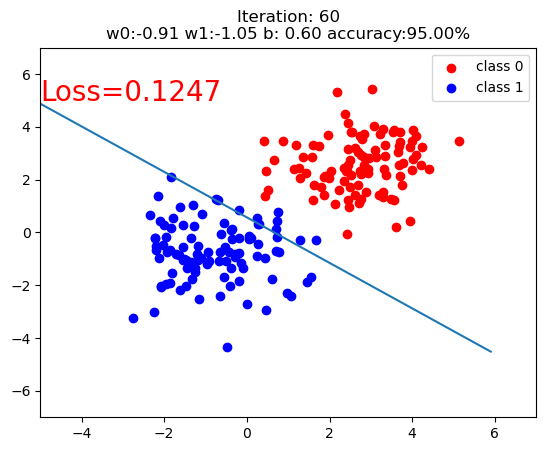

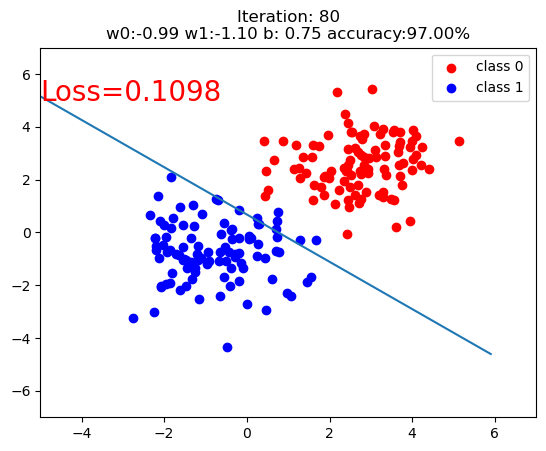

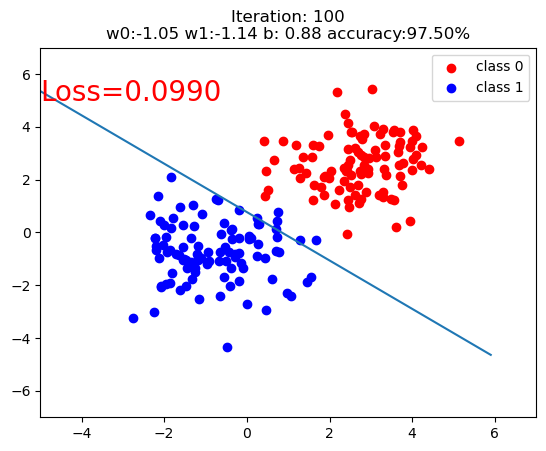

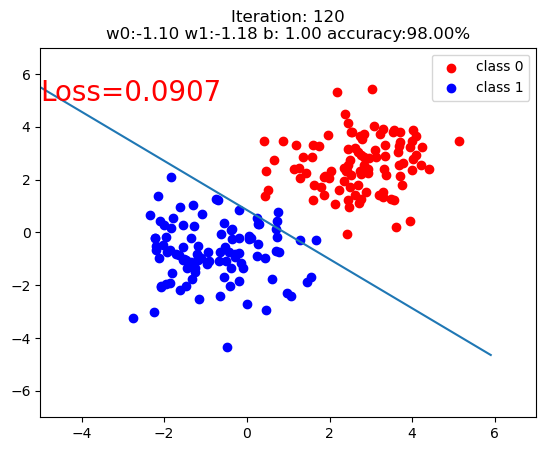

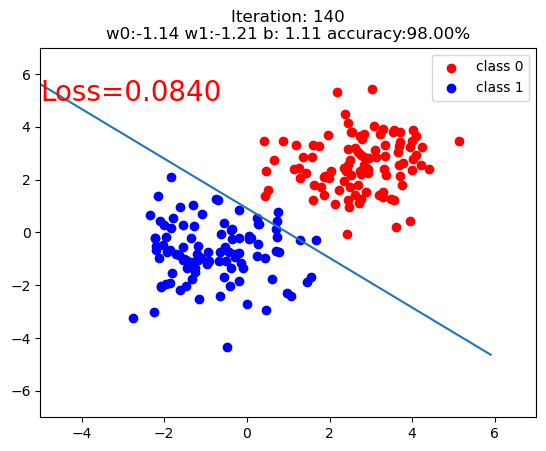

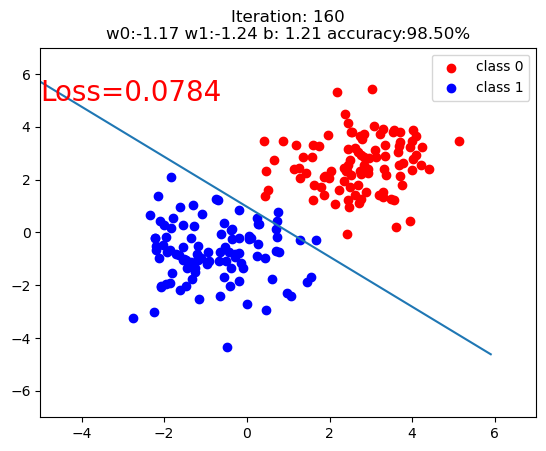

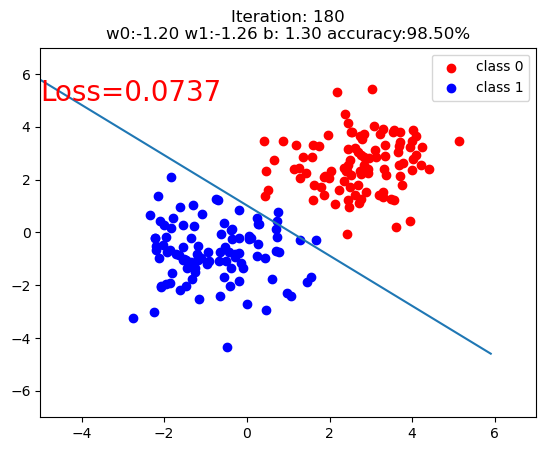

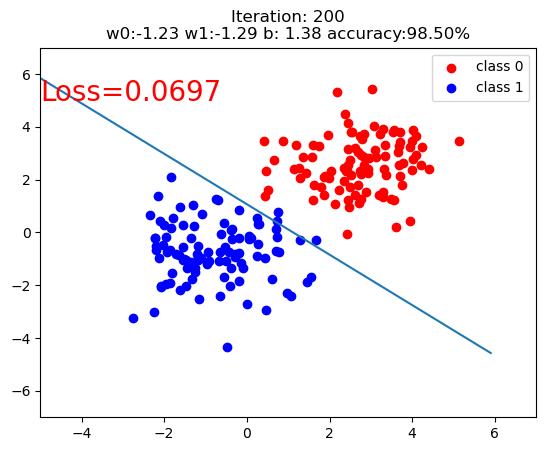

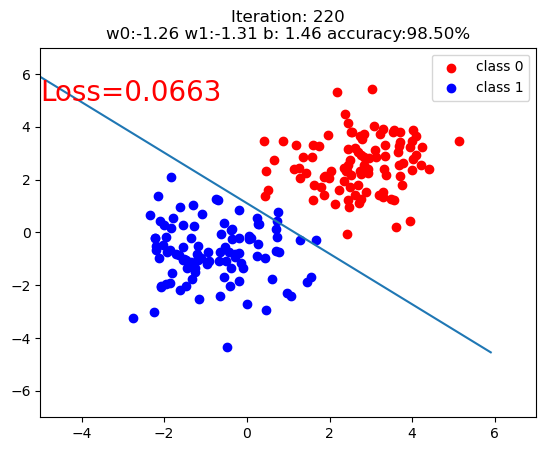

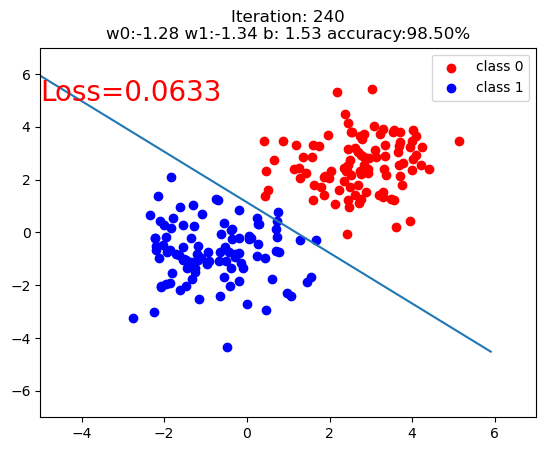

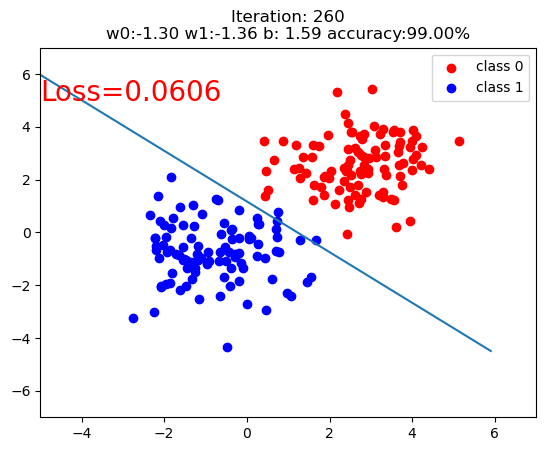

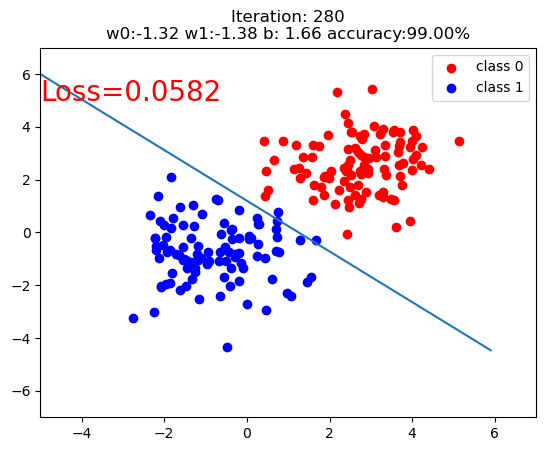

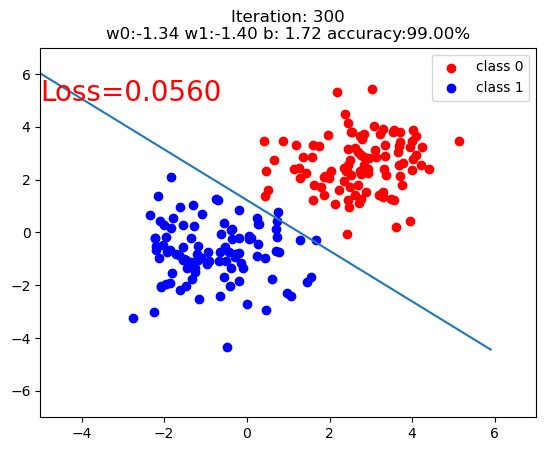

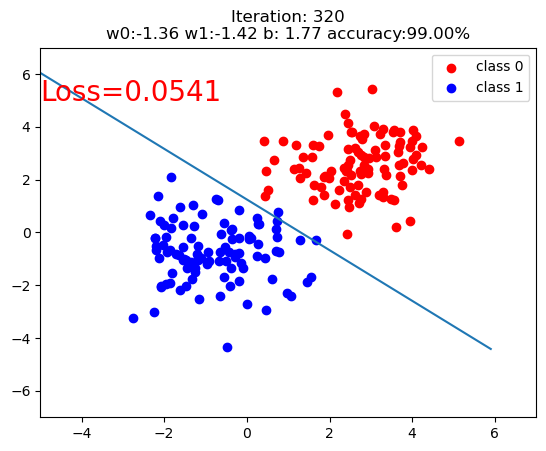

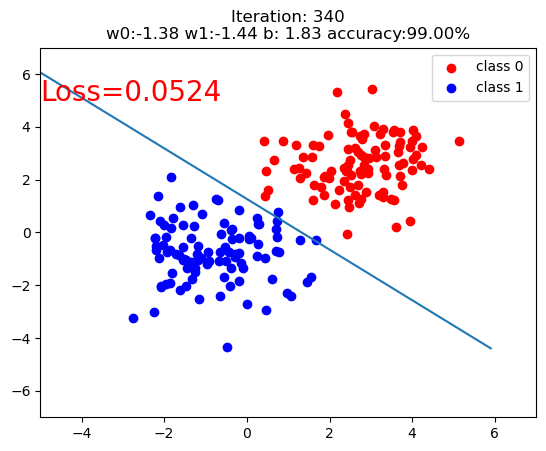

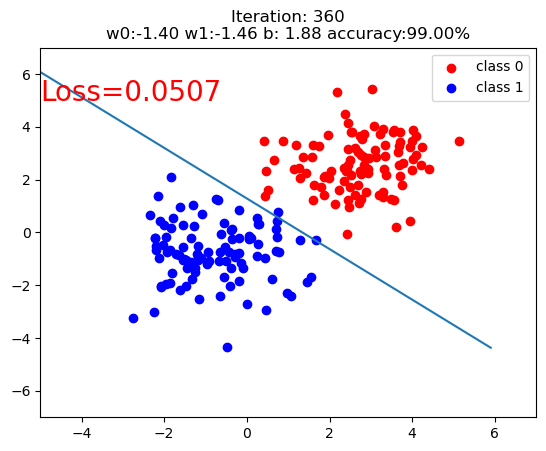

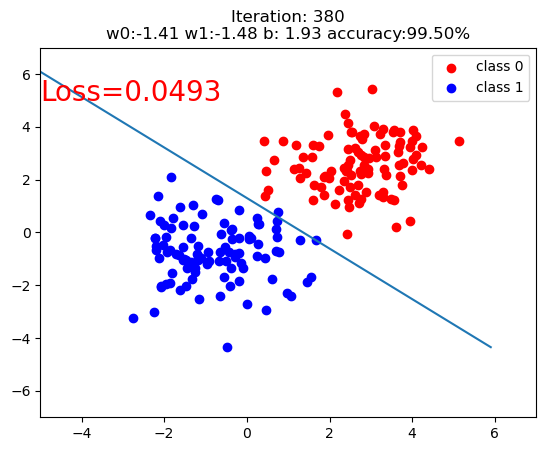

In [22]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(10)

# ============================ step 1/5 生成数据 ============================
sample_nums = 100
mean_value = 1.7
bias = 1
n_data = torch.ones(sample_nums, 2)
# 使用正态分布随机生成样本，均值为张量，方差为标量
x0 = torch.normal(mean_value * n_data, 1) + bias      # 类别0 数据 shape=(100, 2)
# 生成对应标签
y0 = torch.zeros(sample_nums)                         # 类别0 标签 shape=(100, 1)
# 使用正态分布随机生成样本，均值为张量，方差为标量
x1 = torch.normal(-mean_value * n_data, 1) + bias     # 类别1 数据 shape=(100, 2)
# 生成对应标签
y1 = torch.ones(sample_nums)                          # 类别1 标签 shape=(100, 1)
train_x = torch.cat((x0, x1), 0)
train_y = torch.cat((y0, y1), 0)

# ============================ step 2/5 选择模型 ============================
class LR(nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        self.features = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.features(x)
        x = self.sigmoid(x)
        return x

lr_net = LR()   # 实例化逻辑回归模型

# ============================ step 3/5 选择损失函数 ============================
loss_fn = nn.BCELoss()

# ============================ step 4/5 选择优化器   ============================
lr = 0.01  # 学习率
optimizer = torch.optim.SGD(lr_net.parameters(), lr=lr, momentum=0.9)

# ============================ step 5/5 模型训练 ============================
for iteration in range(1000):

    # 前向传播
    y_pred = lr_net(train_x)
    # 计算 loss
    loss = loss_fn(y_pred.squeeze(), train_y)
    # 反向传播
    loss.backward()
    # 更新参数
    optimizer.step()
    # 清空梯度
    optimizer.zero_grad()
    # 绘图
    if iteration % 20 == 0:
        mask = y_pred.ge(0.5).float().squeeze()  # 以0.5为阈值进行分类
        correct = (mask == train_y).sum()  # 计算正确预测的样本个数
        acc = correct.item() / train_y.size(0)  # 计算分类准确率

        plt.scatter(x0.data.numpy()[:, 0], x0.data.numpy()[:, 1], c='r', label='class 0')
        plt.scatter(x1.data.numpy()[:, 0], x1.data.numpy()[:, 1], c='b', label='class 1')

        w0, w1 = lr_net.features.weight[0]
        w0, w1 = float(w0.item()), float(w1.item())
        plot_b = float(lr_net.features.bias[0].item())
        plot_x = np.arange(-6, 6, 0.1)
        plot_y = (-w0 * plot_x - plot_b) / w1

        plt.xlim(-5, 7)
        plt.ylim(-7, 7)
        plt.plot(plot_x, plot_y)

        plt.text(-5, 5, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color': 'red'})
        plt.title("Iteration: {}\nw0:{:.2f} w1:{:.2f} b: {:.2f} accuracy:{:.2%}".format(iteration, w0, w1, plot_b, acc))
        plt.legend()
        # plt.savefig(str(iteration / 20)+".png")
        plt.show()
        plt.pause(0.5)
        # 如果准确率大于 99%，则停止训练
        if acc > 0.99:
            break